In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("..\\data\\raw\\raw_data.csv")

In [3]:
## checking first 5 rows
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
## checking the shape of the dataframe
print(f"The number of rows in the dataframe are: {df.shape[0]}")
print(f"The number of columns in the dataframe are: {df.shape[1]}")

The number of rows in the dataframe are: 1000000
The number of columns in the dataframe are: 8


In [5]:
## checking the basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
## finding some more basic info about the dataframe
import os
d = df.describe().T[['min','max']].T.iloc[:,:3].to_json('..\\prediction_service\\schema_in.json')

**We are saving the minimum and maximum value for the numerical columns of the dataframe. This will be used later to validate the inputs provided by the user over a form**

In [7]:
## let's check the number of unique value in each of the feature columns 
for col in df.columns:
    print(f"The number of unique values in the column {col} are : {df[col].nunique()}. \n The unique values are: \n {df[col].unique()} \n ")

The number of unique values in the column distance_from_home are : 1000000. 
 The unique values are: 
 [57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496] 
 
The number of unique values in the column distance_from_last_transaction are : 1000000. 
 The unique values are: 
 [0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012] 
 
The number of unique values in the column ratio_to_median_purchase_price are : 1000000. 
 The unique values are: 
 [1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985] 
 
The number of unique values in the column repeat_retailer are : 2. 
 The unique values are: 
 [1. 0.] 
 
The number of unique values in the column used_chip are : 2. 
 The unique values are: 
 [1. 0.] 
 
The number of unique values in the column used_pin_number are : 2. 
 The unique values are: 
 [0. 1.] 
 
The number of unique values in the column online_order are : 2. 
 The unique values are: 
 [0. 1.] 
 
The number of unique val

**Using the number of unique values in the column we can classify it as either numerical or categorical**

In [8]:
num_col = []
cat_col = []

for col in df.columns:
    if col == 'fraud':
        pass
    else:
        if df[col].nunique() <= 20:
            cat_col.append(col)
        else:
            num_col.append(col)

In [9]:
print(f"Numerical columns present in the dataframe are: {num_col}")
print(f"Categorical columns present in the dataframe are: {cat_col}")

Numerical columns present in the dataframe are: ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
Categorical columns present in the dataframe are: ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']


In [10]:
## checking the number of missing values in the dataframe
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**No missing values in the provided data**

<AxesSubplot:>

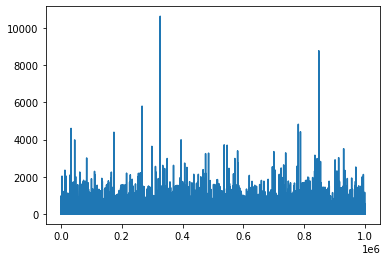

In [11]:
## checking the distribution of the values in the numerical column of the dataframe
df['distance_from_home'].plot()

<AxesSubplot:>

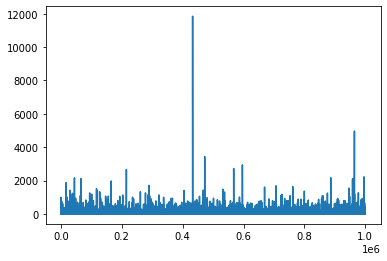

In [12]:
df['distance_from_last_transaction'].plot()

<AxesSubplot:>

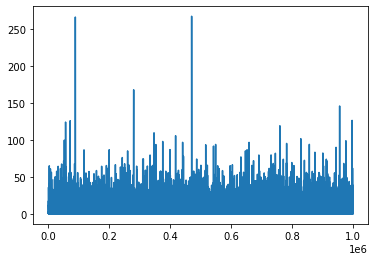

In [13]:
df['ratio_to_median_purchase_price'].plot()

### Since we are training the model to detect the fraud related to the credit card transactions, i think removing outliers would be unwise since they could give some useful info

### This data doesn't need any preprocessing. SO, moving directly to the train-test split